In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ppi = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ppi_human.txt', sep = '\t')
print(len(ppi))
ppi.head()

315934


,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B
0,11777,537,0.045,Q9HCE7,Q9BYM8
1,11777,5865,0.508,Q9HCE7,P51668
2,11777,10925,0.080,Q9HCE7,P17844
3,11777,6695,0.156,Q9HCE7,P38646
4,11777,4966,0.264,Q9HCE7,Q9H469


In [ ]:
ppi['Interaction'] = (ppi['Interaction'] > 0).astype(int)
ppi.head()

,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B
0,11777,537,1,Q9HCE7,Q9BYM8
1,11777,5865,1,Q9HCE7,P51668
2,11777,10925,1,Q9HCE7,P17844
3,11777,6695,1,Q9HCE7,P38646
4,11777,4966,1,Q9HCE7,Q9H469


In [ ]:
num_of_protein_A = len(ppi['Protein_A_idx'].unique())
num_of_protein_B = len(ppi['Protein_B_idx'].unique())

In [ ]:
info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/protein_information.txt', sep = '\t')
print(len(info))
info.head()

14407


,Index,Uniprot_ID,Protein_names,Length,Organism_ID,Gene_name,Subcellular_location,GO(CC),Tissue_specificity,GeneID,PDB,Degree,mean_score_top_10_pred
0,0,Q8TBF5,Phosphatidylinositol-glycan biosynthesis class...,258,9606,PIGX,Endoplasmic reticulum membrane {ECO:0000250}; ...,endoplasmic reticulum membrane [GO:0005789]; i...,NaN,54965;,NA;,1,0.865861
1,1,Q8TBF4,Zinc finger CCHC-type and RNA-binding motif-co...,217,9606,ZCRB1,"Nucleus, nucleoplasm {ECO:0000269|PubMed:15146...",nucleoplasm [GO:0005654]; U12-type spliceosoma...,NaN,85437;,2E5H;,55,0.989386
2,2,Q5MIZ7,Serine/threonine-protein phosphatase 4 regulat...,849,9606,PPP4R3B,Cytoplasm {ECO:0000269|PubMed:18487071}. Cytop...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,Moderately expressed in tissues and specific b...,57223;,NA;,27,0.987056
3,3,Q9NVL8,Uncharacterized protein CCDC198,296,9606,CCDC198,NaN,NaN,NaN,55195;,NA;,4,0.923086
4,4,Q8TBF2,Prostamide/prostaglandin F synthase (Prostamid...,198,9606,PRXL2B,"Cytoplasm, cytosol {ECO:0000250|UniProtKB:Q9DB...",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,NaN,127281;,NA;,5,0.953029


In [ ]:
subcellular_location_dict = {k:v for k, v in zip(info['Index'],info['GO(CC)'])}

In [ ]:
ppi['Protein_A_location'] = ppi['Interaction']
ppi['Protein_B_location'] = ppi['Interaction']
for i in range(len(ppi)):
 if subcellular_location_dict[ppi['Protein_A_idx'][i]] == 'nan':
   ppi['Protein_A_location'][i] = 'unknown'
 else:
   ppi['Protein_A_location'][i] = (str(subcellular_location_dict[ppi['Protein_A_idx'][i]]).split('['))[0]
 if subcellular_location_dict[ppi['Protein_B_idx'][i]] == 'nan':
   ppi['Protein_B_location'][i] = 'unknown'
 else: 
   ppi['Protein_B_location'][i] = (str(subcellular_location_dict[ppi['Protein_B_idx'][i]]).split('['))[0]
ppi.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp

,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B,Protein_A_location,Protein_B_location
0,11777,537,1,Q9HCE7,Q9BYM8,axon,cytosol
1,11777,5865,1,Q9HCE7,P51668,axon,cytoplasm
2,11777,10925,1,Q9HCE7,P17844,axon,catalytic step 2 spliceosome
3,11777,6695,1,Q9HCE7,P38646,axon,cytoplasm
4,11777,4966,1,Q9HCE7,Q9H469,axon,cytoplasm
...,...,...,...,...,...,...,...
95,11777,14195,1,Q9HCE7,Q9UKA1,axon,cell
96,11777,8354,1,Q9HCE7,O15165,axon,early endosome membrane
97,11777,9685,1,Q9HCE7,Q8N0X7,axon,cytoplasm
98,11777,7622,1,Q9HCE7,O76024,axon,dendrite


In [ ]:
def compile_model(num_of_user, num_of_item, learning_rate = 0.001):
  VECTOR_DIMENSION = 8

  protein_A_input = keras.layers.Input((1,))
  protein_A_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_A_embedding', embeddings_initializer = 'he_normal')
  protein_A = protein_A_embedding(protein_A_input)
  protein_A = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_A)

  protein_A_bias = keras.layers.Embedding(num_of_protein_A, 1, embeddings_initializer = 'he_normal')
  protein_A_b = protein_A_bias(protein_A_input)
  protein_A_b = keras.layers.Reshape((1,))(protein_A_b)

  protein_B_input = keras.layers.Input((1,))
  protein_B_embedding = keras.layers.Embedding(num_of_protein_B, VECTOR_DIMENSION, input_length = 1, name = 'protein_B_embedding', embeddings_initializer = 'he_normal')
  protein_B = protein_B_embedding(protein_B_input)
  protein_B = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_B)

  protein_B_b = protein_A_bias(protein_B_input)
  protein_B_b = keras.layers.Reshape((1,))(protein_B_b)

  protein_A_location_input = keras.layers.Input((1,))
  protein_A_location_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_A_location_embedding')
  protein_A_location = protein_A_location_embedding(protein_A_location_input)
  protein_A_location = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_A_location)

  protein_A_location_bias = keras.layers.Embedding(num_of_protein_A, 1, embeddings_initializer = 'he_normal')
  protein_A_lb = protein_A_location_bias(protein_A_location_input)
  protein_A_lb = keras.layers.Reshape((1,))(protein_A_lb)

  protein_B_location_input = keras.layers.Input((1,))
  protein_B_location_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_B_location_embedding')
  protein_B_location = protein_B_location_embedding(protein_B_location_input)
  protein_B_location = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_B_location)

  protein_B_location_bias = keras.layers.Embedding(num_of_protein_B, 1, embeddings_initializer = 'he_normal')
  protein_B_lb = protein_B_location_bias(protein_A_location_input)
  protein_B_lb = keras.layers.Reshape((1,))(protein_B_lb)

  dot_product1 = keras.layers.dot([protein_A, protein_B], axes = 1)
  dot_product2 = keras.layers.dot([protein_A_location, protein_B_location], axes = 1)
  output = keras.layers.Activation('sigmoid')((4*(dot_product1 + protein_A_b + protein_B_b)+(dot_product2 + protein_A_lb + protein_B_lb))/5)
  
  model = keras.models.Model(inputs=[protein_A_input, protein_B_input, protein_A_location_input, protein_B_location_input], outputs = output)
  model.compile(
      loss = 'binary_crossentropy',
      optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
      metrics = ['binary_accuracy'],
  )
  return model

model = compile_model(num_of_protein_A, num_of_protein_B)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 protein_A_embedding (Embedding  (None, 1, 8)        115232      ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 protein_B_embedding (Embedding  (None, 1, 8)        115120      ['input_2[0][0]']            

In [ ]:
pa2idx = {v: k for k, v in dict(enumerate(ppi['Protein_A_idx'].unique())).items()}
pb2idx = {v: k for k, v in dict(enumerate(ppi['Protein_B_idx'].unique())).items()}
paloc2idx = {v: k for k, v in dict(enumerate(ppi['Protein_A_location'].unique())).items()}
pbloc2idx = {v: k for k, v in dict(enumerate(ppi['Protein_B_location'].unique())).items()}

dataset = pd.DataFrame()
dataset['paidx'] = ppi['Protein_A_idx'].map(pa2idx.get)
dataset['pbidx'] = ppi['Protein_B_idx'].map(pb2idx.get)
dataset['paloc'] = ppi['Protein_A_location'].map(paloc2idx.get)
dataset['pbloc'] = ppi['Protein_B_location'].map(pbloc2idx.get)
dataset['y'] = ppi['Interaction']
dataset

,paidx,pbidx,paloc,pbloc,y
0,0,0,0,0,1
1,0,1,0,1,1
2,0,2,0,2,1
3,0,3,0,1,1
4,0,4,0,1,1
...,...,...,...,...,...
315929,5409,6185,1,49,0
315930,9149,10338,24,104,0
315931,472,13901,52,70,0
315932,11791,4912,86,9,0


In [ ]:
data_x = np.array([
                   dataset['paidx'].values, 
                   dataset['pbidx'].values,
                   dataset['paloc'].values,
                   dataset['pbloc'].values
]).T
data_y = np.array([
                   dataset['y'].values
]).T
print(data_x.shape, data_y.shape)
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size = 0.1)
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, test_size = 0.5)
print(
    train_x.shape, train_y.shape, 
    valid_x.shape, valid_y.shape,
    test_x.shape, test_y.shape
)

(315934, 4) (315934, 1)
(284340, 4) (284340, 1) (15797, 4) (15797, 1) (15797, 4) (15797, 1)


In [ ]:
model = compile_model(num_of_protein_A, num_of_protein_B)
history = model.fit(
    x = (train_x[:,0,None], train_x[:,1,None], train_x[:,2,None], train_x[:,3,None]),
    y = train_y, 
    batch_size = 512, 
    epochs = 30, 
    verbose = 'auto', 
    validation_data = ((valid_x[:,0,None], valid_x[:,1,None], valid_x[:,2,None], valid_x[:,3,None]),valid_y),
    shuffle = True, 
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


556/556 [==============================] - 50s 84ms/step - loss: 0.6723 - binary_accuracy: 0.6371 - val_loss: 0.6337 - val_binary_accuracy: 0.7026
Epoch 2/30
556/556 [==============================] - 45s 81ms/step - loss: 0.5906 - binary_accuracy: 0.7250 - val_loss: 0.5524 - val_binary_accuracy: 0.7442
Epoch 3/30
556/556 [==============================] - 45s 81ms/step - loss: 0.5090 - binary_accuracy: 0.7719 - val_loss: 0.4834 - val_binary_accuracy: 0.7809
Epoch 4/30
556/556 [==============================] - 45s 81ms/step - loss: 0.4415 - binary_accuracy: 0.8121 - val_loss: 0.4330 - val_binary_accuracy: 0.8103
Epoch 5/30
556/556 [==============================] - 45s 82ms/step - loss: 0.3911 - binary_accuracy: 0.8452 - val_loss: 0.3983 - val_binary_accuracy: 0.8338
Epoch 6/30
556/556 [==============================] - 45s 80ms/step - loss: 0.3540 - binary_accuracy: 0.8623 - val_loss: 0.3745 - val_binary_accuracy: 0.8455
Epoch 7/30
556/556 [==============================] - 45s 81ms/

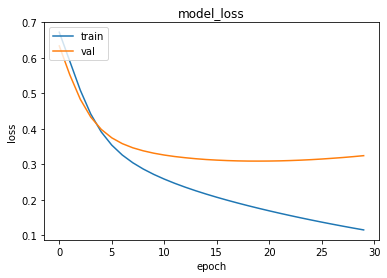

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

In [ ]:
model.evaluate(
    x = (test_x[:,0,None], test_x[:,1,None], test_x[:,2,None], test_x[:,3,None]),
    y = test_y
)

  3/494 [..............................] - ETA: 14s - loss: 0.3558 - binary_accuracy: 0.8324

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


494/494 [==============================] - 15s 31ms/step - loss: 0.3197 - binary_accuracy: 0.8774


[0.3197318911552429, 0.8774391412734985]